# Topographies

In this notebook we examine the spatial distribution of spectral features on the scalp.

We do so by plotting topographies, using MNE, and compare spatial topographies of ratio measures to other spectral features, including for TBR and exponent as well as for ABR and alpha power.

In [1]:
%matplotlib inline

import csv

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from matplotlib import cm

import mne

In [2]:
# Import custom project code
import sys
sys.path.append('../bratios')
from settings import NUM_CHAN

In [3]:
# Load CSVs of data
data = pd.read_csv("../dat/ChildMind/MIPDB_PublicFile.csv")
df = pd.read_csv("../dat/ChildMind/spectral_measures_dataframe.csv")

In [4]:
# Read in list of channel names that are kept in reduced 111 montage
with open('../dat/ChildMind/chans111.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    ch_labels = list(reader)[0]
    
# Read montage, reduced to 111 channel selection
montage = mne.channels.read_montage('GSN-HydroCel-129', ch_names=ch_labels)

# Create the info structure needed by MNE
info = mne.create_info(ch_labels, 500, 'eeg', montage)

# Create the MNE Raw data object
raw = mne.io.RawArray(np.zeros([111, 1]), info, verbose=False)

Below we calculate the mean of relevant spectral features across subjects for each channel.

In [13]:
exps = np.zeros(NUM_CHAN)
theta_pw = np.zeros(NUM_CHAN)
alpha_pw = np.zeros(NUM_CHAN)
beta_pw = np.zeros(NUM_CHAN)
tbrs = np.zeros(NUM_CHAN)
abrs = np.zeros(NUM_CHAN)
tars = np.zeros(NUM_CHAN)
ages = np.zeros(NUM_CHAN)
offs = np.zeros(NUM_CHAN)

for chan in range(NUM_CHAN):
    exps[chan] = df[df.Chan_ID == chan].Exp.mean()
    theta_pw[chan] = df[df.Chan_ID == chan].Theta_PW.mean()
    alpha_pw[chan] = df[df.Chan_ID == chan].Alpha_PW.mean()
    beta_pw[chan] = df[df.Chan_ID == chan].Beta_PW.mean()
    tbrs[chan] = df[df.Chan_ID == chan].TBR.mean()
    abrs[chan] = df[df.Chan_ID == chan].ABR.mean()
    tars[chan] = df[df.Chan_ID == chan].TAR.mean()
    ages[chan] = df[df.Chan_ID == chan].Age.mean()
    offs[chan] = df[df.Chan_ID == chan].Off.mean()
        
params = [exps, alpha_pw, tbrs, abrs]
str_params = ["exps","alpha_pw",'tbrs','abrs']

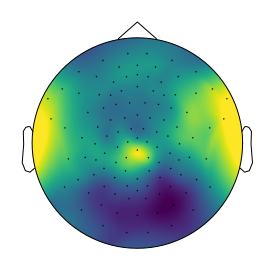

In [50]:
#TAR
fig, ax = plt.subplots();
mne.viz.plot_topomap(tars, raw.info, vmin=min(tars), vmax=max(tars), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("TAR");
fig.savefig('../figures/RealData/topos/' + 'TAR-topo.pdf');

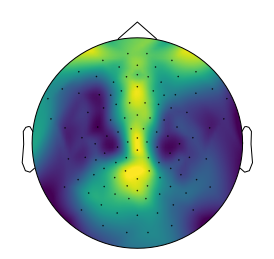

In [25]:
#TBR
fig, ax = plt.subplots();
mne.viz.plot_topomap(tbrs, raw.info, vmin=min(tbrs), vmax=max(tbrs), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("TBR")
fig.savefig('../figures/RealData/topos/' + 'TBR-topo.pdf');

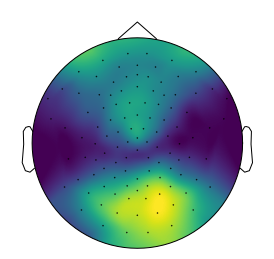

In [26]:
#ABR
fig, ax = plt.subplots();
mne.viz.plot_topomap(abrs, raw.info, vmin=min(abrs), vmax=max(abrs), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("ABR");
fig.savefig('../figures/RealData/topos/' + 'ABR-topo.pdf');

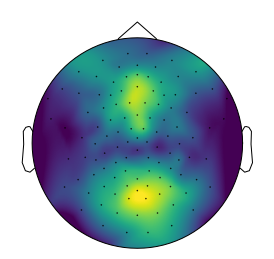

In [27]:
#Exp
fig, ax = plt.subplots();
mne.viz.plot_topomap(exps, raw.info, vmin=min(exps), vmax=max(exps), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("Exp");
fig.savefig('../figures/RealData/topos/' + 'Exp-topo.pdf');

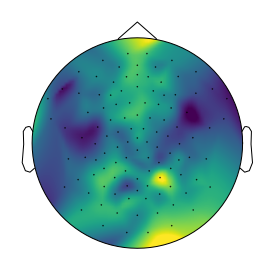

In [29]:
#Theta PW
fig, ax = plt.subplots();
mne.viz.plot_topomap(theta_pw, raw.info, vmin=min(theta_pw), vmax=max(theta_pw), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("Theta PW");
fig.savefig('../figures/RealData/topos/' + 'Theta-PW-topo.pdf');

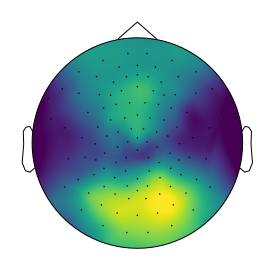

In [30]:
# Alpha PW
fig, ax = plt.subplots();
mne.viz.plot_topomap(alpha_pw, raw.info, vmin=min(alpha_pw), vmax=max(alpha_pw), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("Alpha PW");
fig.savefig('../figures/RealData/topos/' + 'Alpha-PW-topo.pdf');

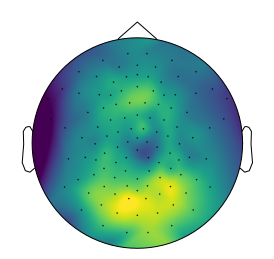

In [31]:
# Beta PW
fig, ax = plt.subplots();
mne.viz.plot_topomap(beta_pw, raw.info, vmin=min(beta_pw), vmax=max(beta_pw), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("Beta PW");
fig.savefig('../figures/RealData/topos/' + 'Beta-PW-topo.pdf');

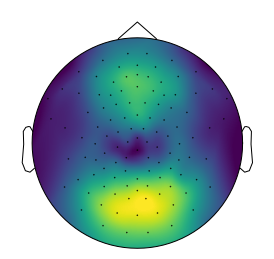

In [32]:
#Offset
fig, ax = plt.subplots();
mne.viz.plot_topomap(offs, raw.info, vmin=min(offs), vmax=max(offs), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("Offs");
fig.savefig('../figures/RealData/topos/' + 'Offset-topo.pdf');

In [16]:
# Calculate correlation between spatial topographies of TAR & alpha power
print("Correlation between Alpha Power and TAR is {:1.4f} with a p-value of {:1.4f}.".format(*spearmanr(tars, alpha_pw)))

Correlation between Alpha Power and TAR is -0.8999 with a p-value of 0.0000.


In [36]:
corr_mat = np.zeros((3,4))
for ind,ratio in enumerate([tars,tbrs,abrs]):
    corr_mat[ind][0] = spearmanr(ratio,theta_pw)[0]
    corr_mat[ind][1] = spearmanr(ratio,alpha_pw)[0]
    corr_mat[ind][2] = spearmanr(ratio,beta_pw)[0]
    corr_mat[ind][3] = spearmanr(ratio,exps)[0]

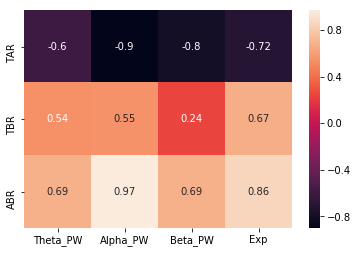

In [49]:
import seaborn as sns
axes = sns.heatmap(corr_mat,yticklabels=["TAR", "TBR", "ABR"], xticklabels=["Theta_PW", "Alpha_PW", "Beta_PW","Exp"],annot=True)

plt.savefig('../figures/RealData/topos/' + 'correlation-plots.pdf')
